In [1]:
# required Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import bayes_mvs, norm, iqr

In [2]:
# Set Nature-like plots
import matplotlib as mpl
# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 19
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
#mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

In [3]:
dataset = pd.read_csv('output/2024-04-02_step7_lamb1987_measures.csv')
dataset

,Euler1,Euler2,Euler3,4samples,8samples,16samples,24samples,6samples,10samples,12samples,14samples,18samples
0,0,0,0,0.000,0.000,0.000,0.226,0.000,0.799,0.000,0.000,0.000
1,0,0,7,0.001,0.000,0.000,0.272,0.000,0.000,0.000,0.000,0.000
2,0,0,14,0.124,0.000,0.000,0.212,0.000,0.000,0.000,0.000,0.244
3,0,0,21,0.000,0.000,0.000,0.249,0.000,0.000,0.000,0.237,0.258
4,0,0,28,0.000,0.000,0.000,0.283,0.001,0.000,0.000,0.227,0.258
...,...,...,...,...,...,...,...,...,...,...,...,...
4389,84,84,147,3.072,0.018,0.014,0.012,0.075,0.012,0.012,0.017,0.009
4390,84,84,154,6.262,0.019,0.010,0.011,0.011,0.010,0.009,0.012,0.009
4391,84,84,161,6.221,0.030,0.007,0.007,0.020,0.013,0.012,0.011,0.014
4392,84,84,168,3.819,0.017,0.008,0.011,0.015,0.011,0.011,0.009,0.011


In [4]:
dataset[['4samples', '6samples', '8samples', '10samples', '12samples',  '14samples','16samples', '18samples', '24samples']].describe()

,4samples,6samples,8samples,10samples,12samples,14samples,16samples,18samples,24samples
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000
mean,8.377426,0.098132,0.067466,0.048677,0.035034,0.032710,0.034656,0.026989,0.030956
std,12.031246,0.431543,0.337638,0.196727,0.139178,0.174582,0.216717,0.078444,0.094602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.523500,0.004000,0.004000,0.003000,0.003000,0.003000,0.003000,0.003000,0.003000
50%,4.266500,0.009000,0.007000,0.006000,0.005000,0.005000,0.004000,0.004000,0.004000
75%,9.900750,0.028000,0.019000,0.015000,0.013000,0.011000,0.010000,0.011000,0.011000
max,93.678000,14.651000,12.852000,5.957000,4.855000,8.890000,8.729000,1.458000,2.498000


## Visualize distributions

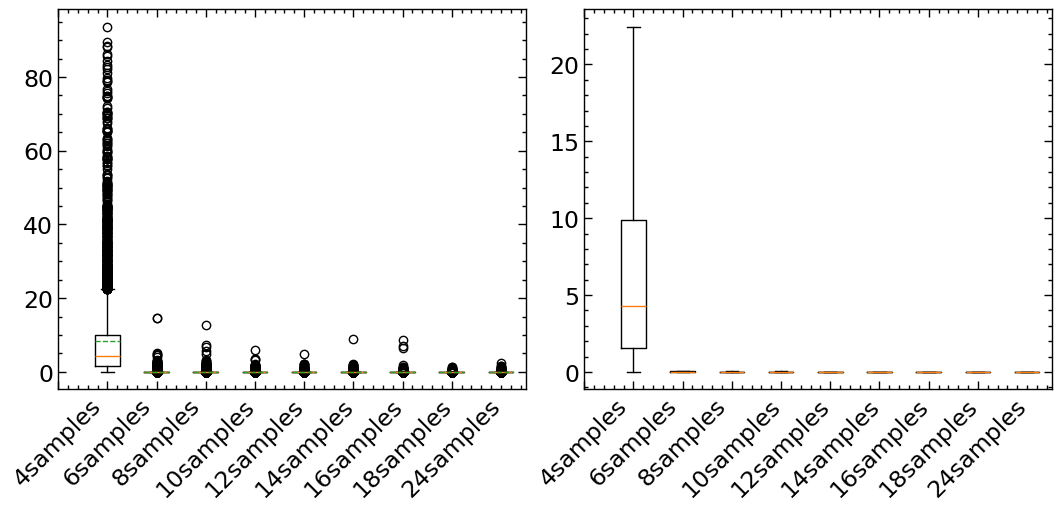

In [5]:
labels = ['4samples', '6samples', '8samples', '10samples', '12samples',  '14samples','16samples', '18samples', '24samples']

fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*2.1,5), constrained_layout=True)

ax1.boxplot(dataset[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(9), labels, rotation=45) 

ax2.boxplot(dataset[labels], showfliers=False, labels=labels)
_ = ax2.set_xticks(np.arange(9), labels, rotation=45) 



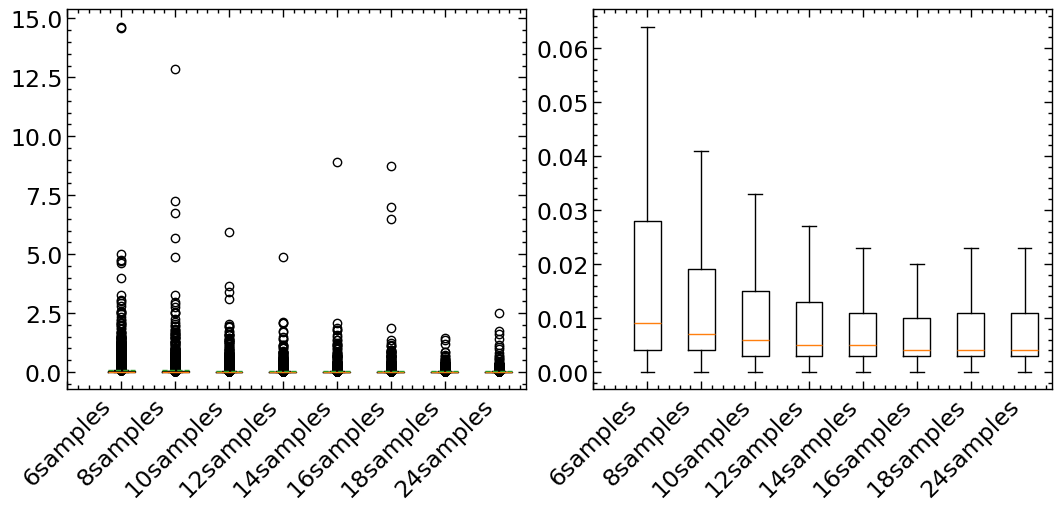

In [6]:
labels = ['6samples', '8samples', '10samples', '12samples',  '14samples','16samples', '18samples', '24samples']

fig1b, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*2.1,5), constrained_layout=True)

ax1.boxplot(dataset[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(8), labels, rotation=45) 

ax2.boxplot(dataset[labels], showfliers=False, labels=labels)
_ = ax2.set_xticks(np.arange(8), labels, rotation=45) 

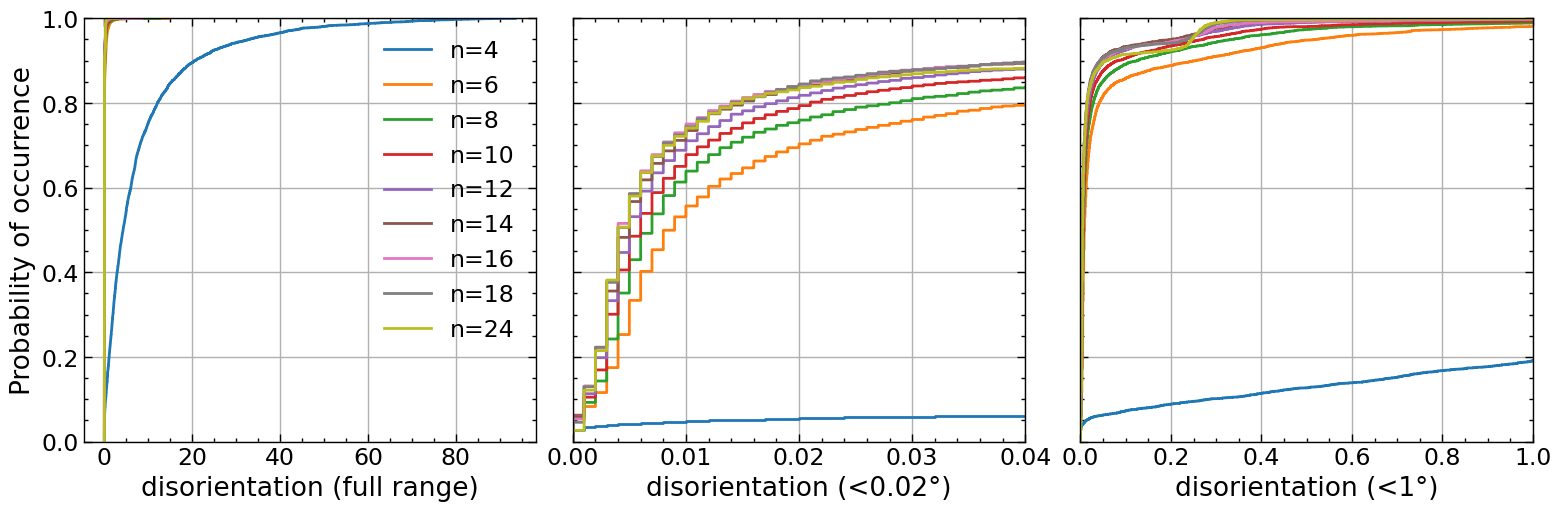

In [7]:
fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5*3.1, 5), sharey=True, constrained_layout=True)

ax1.ecdf(dataset['4samples'], label='n=4')
ax1.ecdf(dataset['6samples'], label='n=6')
ax1.ecdf(dataset['8samples'], label='n=8')
ax1.ecdf(dataset['10samples'], label='n=10')
ax1.ecdf(dataset['12samples'], label='n=12')
ax1.ecdf(dataset['14samples'], label='n=14')
ax1.ecdf(dataset['16samples'], label='n=16')
ax1.ecdf(dataset['18samples'], label='n=18')
ax1.ecdf(dataset['24samples'], label='n=24')
ax1.grid(True)
ax1.set_xlabel('disorientation (full range)')
ax1.set_ylabel("Probability of occurrence")
ax1.legend(loc='best')

ax2.ecdf(dataset['4samples'], label='n=4')
ax2.ecdf(dataset['6samples'], label='n=6')
ax2.ecdf(dataset['8samples'], label='n=8')
ax2.ecdf(dataset['10samples'], label='n=10')
ax2.ecdf(dataset['12samples'], label='n=12')
ax2.ecdf(dataset['14samples'], label='n=14')
ax2.ecdf(dataset['16samples'], label='n=16')
ax2.ecdf(dataset['18samples'], label='n=18')
ax2.ecdf(dataset['24samples'], label='n=24')
ax2.set_xlim(left=0, right=0.04)
ax2.grid(True)
ax2.set_xlabel('disorientation (<0.02°)')

ax3.ecdf(dataset['4samples'], label='n=4')
ax3.ecdf(dataset['6samples'], label='n=6')
ax3.ecdf(dataset['8samples'], label='n=8')
ax3.ecdf(dataset['10samples'], label='n=10')
ax3.ecdf(dataset['12samples'], label='n=12')
ax3.ecdf(dataset['14samples'], label='n=14')
ax3.ecdf(dataset['16samples'], label='n=16')
ax3.ecdf(dataset['18samples'], label='n=18')
ax3.ecdf(dataset['24samples'], label='n=24')
ax3.set_xlim(left=0, right=1)
ax3.set_xlabel('disorientation (<1°)')
_ = ax3.grid(True)

In [8]:
def median_ci(pop, n, ci=0.95):
    """ Estimate the approximate ci 95% error margins for the median
    using a rule of thumb based on Hollander and Wolfe (1999).
    """

    z_score = norm.ppf(1 - (1 - ci) / 2)  # two-tailed z score

    id_upper = 1 + (n / 2) + (z_score * np.sqrt(n)) / 2
    id_lower = (n / 2) - (z_score * np.sqrt(n)) / 2

    if int(np.ceil(id_upper)) >= len(pop):
        upper_ci, lower_ci = pop[-1], pop[int(np.floor(id_lower))]
    else:
        upper_ci, lower_ci = pop[int(np.ceil(id_upper))], pop[int(np.floor(id_lower))]
    interval = upper_ci - lower_ci

    return (lower_ci, upper_ci), interval

def median(pop, ci=0.95):
    """ Returns the median, the interquartile length, and the confidence
    intervals for the median based on th rule-of-thumb method of Hollander
    and Wolfe (1999).
    """
    pop, n = np.sort(pop), len(pop)
    median, iqr_range = np.median(pop), iqr(pop)

    # compute confidence intervals
    ci_limits, length = median_ci(pop, n, ci)

    return median, iqr_range, ci_limits, length

In [9]:
mid_4samples, iqr_4samples, ci_4samples, length_4samples = median(dataset['4samples'])
mid_6samples, iqr_6samples, ci_6samples, length_6samples = median(dataset['6samples'])
mid_8samples, iqr_8samples, ci_8samples, length_8samples = median(dataset['8samples'])
mid_10samples, iqr_10samples, ci_10samples, length_10samples = median(dataset['10samples'])
mid_12samples, iqr_12samples, ci_12samples, length_12samples = median(dataset['12samples'])
mid_14samples, iqr_14samples, ci_14samples, length_14samples = median(dataset['14samples'])
mid_16samples, iqr_16samples, ci_16samples, length_16samples = median(dataset['16samples'])
mid_18samples, iqr_18samples, ci_18samples, length_18samples = median(dataset['18samples'])
mid_24samples, iqr_24samples, ci_24samples, length_24samples = median(dataset['24samples'])

print('EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)')
print('')
print('using 4 measures')
print(f'Median: {mid_4samples:.3f}; min,max: {ci_4samples}')
print(f'   IQR: {iqr_4samples:.3f}; length: {length_4samples:.3f}')
print('')
print('using 6 measures')
print(f'Median: {mid_6samples:.3f}; min,max: {ci_6samples}')
print(f'   IQR: {iqr_6samples:.3f}; length: {length_6samples:.3f}')
print('')
print('using 8 measures')
print(f'Median: {mid_8samples:.3f}; min,max: {ci_8samples}')
print(f'   IQR: {iqr_8samples:.3f}; length: {length_8samples:.3f}')
print('')
print('using 10 measures')
print(f'Median: {mid_10samples:.3f}; min,max: {ci_10samples}')
print(f'   IQR: {iqr_10samples:.3f}; length: {length_10samples:.3f}')
print('')
print('using 12 measures')
print(f'Median: {mid_12samples:.3f}; min,max: {ci_12samples}')
print(f'   IQR: {iqr_12samples:.3f}; length: {length_12samples:.3f}')
print('')
print('using 14 measures')
print(f'Median: {mid_14samples:.3f}; min,max: {ci_14samples}')
print(f'   IQR: {iqr_14samples:.3f}; length: {length_14samples:.3f}')
print('')
print('using 16 measures')
print(f'Median: {mid_16samples:.3f}; min,max: {ci_16samples}')
print(f'   IQR: {iqr_16samples:.3f}; length: {length_16samples:.3f}')
print('')
print('using 18 measures')
print(f'Median: {mid_18samples:.3f}; min,max: {ci_18samples}')
print(f'   IQR: {iqr_18samples:.3f}; length: {length_18samples:.3f}')
print('')
print('using 24 measures')
print(f'Median: {mid_24samples:.3f}; min,max: {ci_24samples}')
print(f'   IQR: {iqr_24samples:.3f}; length: {length_24samples:.3f}')
print('')



EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)

using 4 measures
Median: 4.267; min,max: (4.031, 4.512)
   IQR: 8.377; length: 0.481

using 6 measures
Median: 0.009; min,max: (0.008, 0.009)
   IQR: 0.024; length: 0.001

using 8 measures
Median: 0.007; min,max: (0.006, 0.007)
   IQR: 0.015; length: 0.001

using 10 measures
Median: 0.006; min,max: (0.006, 0.006)
   IQR: 0.012; length: 0.000

using 12 measures
Median: 0.005; min,max: (0.005, 0.005)
   IQR: 0.010; length: 0.000

using 14 measures
Median: 0.005; min,max: (0.005, 0.005)
   IQR: 0.008; length: 0.000

using 16 measures
Median: 0.004; min,max: (0.004, 0.004)
   IQR: 0.007; length: 0.000

using 18 measures
Median: 0.004; min,max: (0.004, 0.005)
   IQR: 0.008; length: 0.001

using 24 measures
Median: 0.004; min,max: (0.004, 0.005)
   IQR: 0.008; length: 0.001



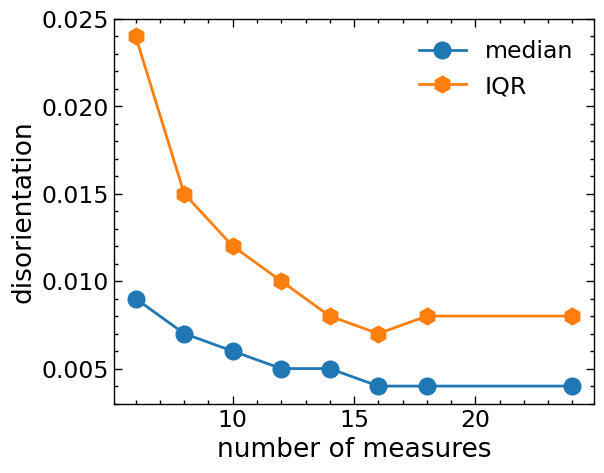

In [10]:
fig, ax = plt.subplots()

ax.plot([6, 8, 10, 12, 14, 16, 18, 24], [0.009, 0.007, 0.006, 0.005, 0.005, 0.004, 0.004, 0.004], 'o-', label='median')
ax.plot([6, 8, 10, 12, 14, 16, 18, 24], [0.024, 0.015, 0.012, 0.010, 0.008, 0.007, 0.008, 0.008], 'h-', label='IQR')
ax.set_ylabel('disorientation')
ax.set_xlabel('number of measures')
ax.legend(loc='best')

## Percent of wrong estimates

In [11]:
print('% of wrong estimates:')
print(f"Percent above 1 degree (n=04): {100 * (dataset['4samples'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (n=06): {100 * (dataset['6samples'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (n=08): {100 * (dataset['8samples'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (n=10): {100 * (dataset['10samples'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (n=12): {100 * (dataset['12samples'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (n=14): {100 * (dataset['14samples'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (n=16): {100 * (dataset['16samples'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (n=18): {100 * (dataset['18samples'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (n=24): {100 * (dataset['24samples'] > 1).mean():.1f} %")

% of wrong estimates:
Percent above 1 degree (n=04): 80.9 %
Percent above 1 degree (n=06): 1.9 %
Percent above 1 degree (n=08): 1.1 %
Percent above 1 degree (n=10): 0.7 %
Percent above 1 degree (n=12): 0.3 %
Percent above 1 degree (n=14): 0.3 %
Percent above 1 degree (n=16): 0.2 %
Percent above 1 degree (n=18): 0.1 %
Percent above 1 degree (n=24): 0.1 %


Text(0.5, 0, 'number of measures')

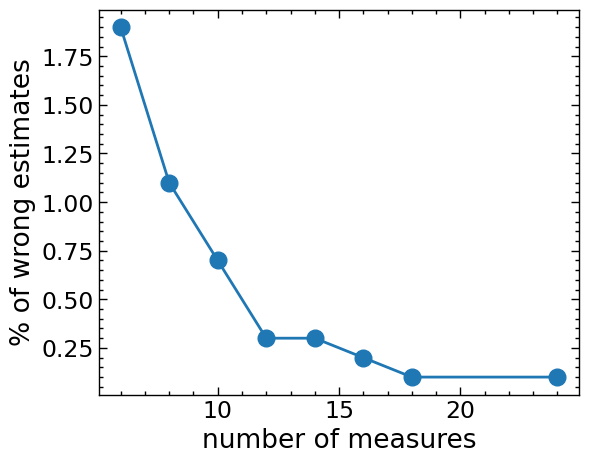

In [12]:
fig, ax = plt.subplots()

ax.plot([6, 8, 10, 12, 14, 16, 18, 24], [1.9, 1.1, 0.7, 0.3, 0.3, 0.2, 0.1, 0.1], 'o-')
ax.set_ylabel('% of wrong estimates')
ax.set_xlabel('number of measures')

## Others

In [17]:
dataset[dataset['16samples'] > 1]

,Euler1,Euler2,Euler3,4samples,8samples,16samples,24samples,6samples,10samples,12samples,14samples,18samples
704,14,7,14,24.159,0.040,1.091,0.003,0.056,0.525,0.018,1.357,0.199
711,14,7,63,21.514,0.064,1.349,0.003,0.314,0.027,0.008,0.002,0.012
2003,35,84,7,9.067,0.040,8.729,0.003,0.016,0.004,0.003,0.007,0.007
2055,42,7,7,5.793,0.522,1.157,0.002,0.093,0.036,0.119,0.041,0.002
2057,42,7,21,7.003,0.278,1.849,0.004,1.678,0.674,0.045,0.035,0.003
3717,70,84,175,6.066,0.013,6.488,0.005,0.029,0.006,0.007,0.004,0.004
3753,77,7,63,32.878,0.339,1.215,0.009,1.257,0.377,0.013,0.123,0.020
3821,77,21,175,0.033,0.243,1.083,0.026,0.218,1.191,0.045,1.851,0.303
4087,84,7,35,0.738,0.744,7.000,0.009,0.423,0.696,0.058,0.006,0.423


In [18]:
dataset[dataset['18samples'] > 1]

,Euler1,Euler2,Euler3,4samples,8samples,16samples,24samples,6samples,10samples,12samples,14samples,18samples
3457,70,14,175,1.580,0.564,0.003,0.035,0.115,0.242,0.043,0.020,1.358
3754,77,7,70,1.577,0.029,0.026,0.007,1.528,0.347,0.063,0.011,1.185
4133,84,14,175,0.164,0.124,0.025,0.353,0.144,0.145,0.080,1.242,1.458


In [19]:
dataset[dataset['24samples'] > 1]

,Euler1,Euler2,Euler3,4samples,8samples,16samples,24samples,6samples,10samples,12samples,14samples,18samples
56,0,14,28,6.715,0.206,0.080,1.414,0.400,0.098,0.375,0.280,0.019
391,7,14,7,1.570,1.684,0.007,1.732,1.269,1.619,0.095,0.087,0.048
712,14,7,70,1.381,0.047,0.128,1.076,0.164,1.021,0.020,0.813,0.001
1740,35,7,168,3.100,0.542,0.006,1.621,1.058,0.219,0.033,0.005,0.002
3481,70,21,161,7.273,4.888,0.014,2.498,0.034,0.015,0.009,0.009,0.011
3846,77,28,168,6.405,1.635,0.672,1.157,0.018,0.025,0.029,0.026,0.003
